In [1]:
#importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# INTRO
### The datasets are from an unnamed business' online retail sales. Unfortunately, they have had to cut back from 25 employees to 5 because of the economic downturn with the corona virus

In [2]:
#importing and reading the csv file of the datatset
import os
import chardet
notebook_path = os.getcwd()
print(notebook_path)
with open('business.retailsales.csv','rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])

C:\Users\Ikeoluwa\Documents
ascii


In [4]:
dataset = pd.read_csv("business.retailsales.csv",encoding = 'ascii')

In [5]:
dataset.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


### Dataset Source:
#### https://www.kaggle.com/datasets/tylermorse/retail-business-sales-20172019

#### Goals
###### 1.) To see which product types have the highest gross sales.
###### 2.) To know if there is a correlation between discounts and returns.
###### 3.) To find out if there is any correlation between net qry and discounts.
###### 4.) To discover how this business can increase sales.

In [6]:
#Doing some initial investigations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [7]:
dataset.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [8]:
dataset.isna().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [9]:
# Rename columns to make them easier to work with
dataset.columns = ['product_type', 'net_qty', 'gross_sales', 'discounts', 'returns', 'total_net_sales']
dataset

,product_type,net_qty,gross_sales,discounts,returns,total_net_sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


In [12]:
#Group sales by product_type and arranging in descending order of gross sales
grouped_sales = dataset.groupby('product_type').sum().sort_values('gross_sales', ascending = False).reset_index()
grouped_sales

,product_type,net_qty,gross_sales,discounts,returns,total_net_sales
0,Basket,1461,143815.50,-4584.42,-4439.69,134791.39
1,Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85
2,Jewelry,991,31048.00,-965.85,-509.20,29572.95
3,Home Decor,404,27114.55,-991.21,-423.35,25699.99
4,Kitchen,809,16096.00,-431.11,-328.07,15336.82
5,Christmas,575,15476.00,-345.19,-670.00,14460.81
6,Soapstone,199,4795.50,-96.91,-69.50,4629.09
7,Accessories,84,3892.40,-107.02,0.00,3785.38
8,Kids,140,3838.00,-116.66,0.00,3721.34
9,Recycled Art,99,3792.80,-88.64,0.00,3704.16


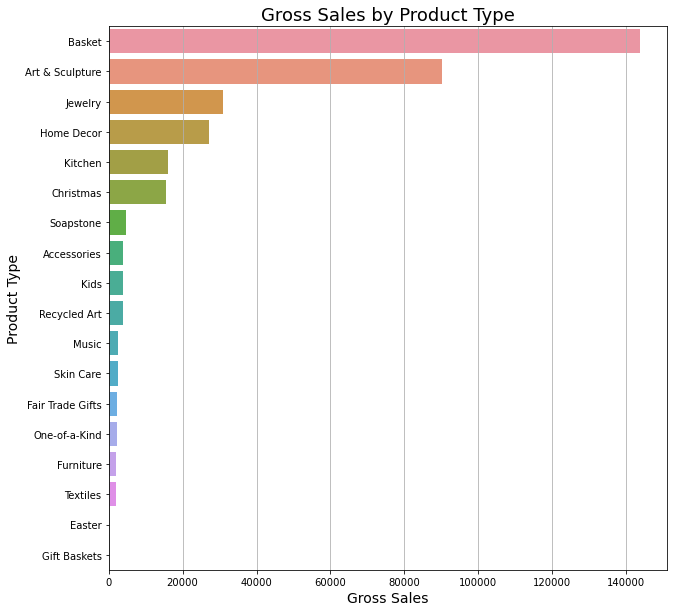

In [21]:
#Creating a barplot showing gross sales by product type in descending order
plt.figure(figsize = (10, 10))
sns.barplot(x = grouped_sales.sort_values('gross_sales', ascending = False)['gross_sales'],
           y = grouped_sales.sort_values('gross_sales', ascending = False)['product_type'])
plt.title('Gross Sales by Product Type', fontsize = 18)
plt.xlabel('Gross Sales', fontsize = 14)
plt.ylabel('Product Type', fontsize = 14)
plt.grid(axis = 'x')

#### The code for this graph was gotten from Kaggle  

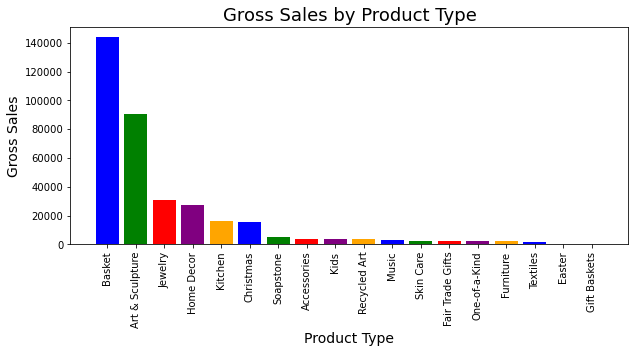

In [41]:
plt.figure(figsize=(10,4))
x = grouped_sales.sort_values('gross_sales', ascending = False)['gross_sales']
y = grouped_sales.sort_values('gross_sales', ascending = False)['product_type']
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(y, x,color=colors)
plt.xlabel('Product Type',fontsize = 14)
plt.ylabel('Gross Sales',fontsize = 14)
plt.title('Gross Sales by Product Type',fontsize = 18)
plt.xticks(rotation='vertical')
plt.show()

#### The code for this graph was written by me and my basic and little knowledge on data visualization using matplotlib

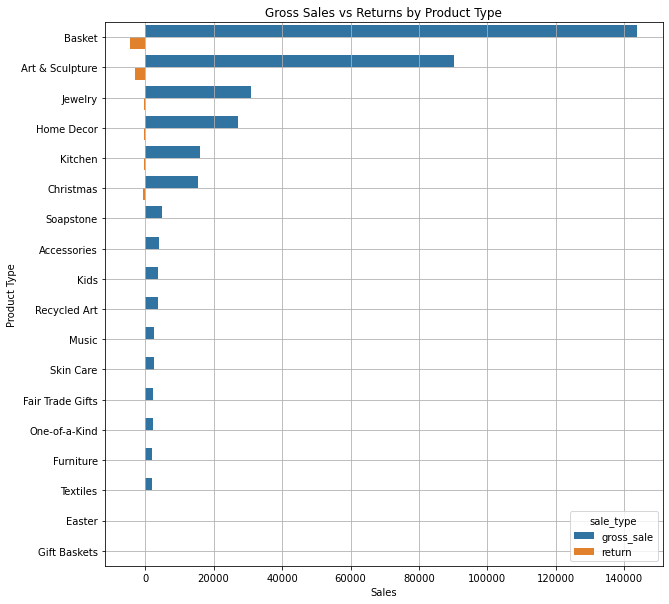

In [42]:
# Classify sales and returns
gross_sales = dataset.loc[:, ['product_type', 'gross_sales']].groupby('product_type').sum()
gross_sales.rename(columns = {'gross_sales': 'sales'}, inplace = True)
gross_sales['sale_type'] = 'gross_sale'

returns = dataset.loc[:, ['product_type', 'returns']].groupby('product_type').sum()
returns.rename(columns = {'returns': 'sales'}, inplace = True)
returns['sale_type'] = 'return'

combined_sales_returns = pd.concat([gross_sales, returns]).reset_index()
# Create barplot comparing gross sales vs returns
plt.figure(figsize = (10, 10))
sns.barplot(x = 'sales', 
           y = 'product_type',
           hue = 'sale_type',
           data = combined_sales_returns.sort_values(['sales', 'sale_type'], ascending = [False, False]))
plt.title('Gross Sales vs Returns by Product Type')
plt.xlabel('Sales')
plt.ylabel('Product Type')
plt.grid()

In [43]:
combined_sales_returns

,product_type,sales,sale_type
0,Accessories,3892.40,gross_sale
1,Art & Sculpture,90316.60,gross_sale
2,Basket,143815.50,gross_sale
3,Christmas,15476.00,gross_sale
4,Easter,38.00,gross_sale
5,Fair Trade Gifts,2258.00,gross_sale
6,Furniture,2034.00,gross_sale
7,Gift Baskets,19.50,gross_sale
8,Home Decor,27114.55,gross_sale
9,Jewelry,31048.00,gross_sale


In [44]:
returns

,sales,sale_type
product_type,,
Accessories,0.00,return
Art & Sculpture,-2879.93,return
Basket,-4439.69,return
Christmas,-670.00,return
Easter,0.00,return
Fair Trade Gifts,0.00,return
Furniture,0.00,return
Gift Baskets,0.00,return
Home Decor,-423.35,return


In [45]:
gross_sales

,sales,sale_type
product_type,,
Accessories,3892.40,gross_sale
Art & Sculpture,90316.60,gross_sale
Basket,143815.50,gross_sale
Christmas,15476.00,gross_sale
Easter,38.00,gross_sale
Fair Trade Gifts,2258.00,gross_sale
Furniture,2034.00,gross_sale
Gift Baskets,19.50,gross_sale
Home Decor,27114.55,gross_sale


In [46]:
# Create correlation matrix
corr_matrix = dataset.corr(min_periods = 3)

Text(0.5, 1.0, 'Correlation Between Stats')

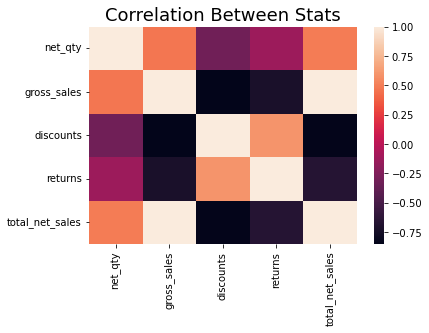

In [47]:
# Create heatmap to see correlations
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns, autopct = )
plt.title('Correlation Between Stats', fontsize = 18)

# Analysis
### 1.) To see which product types have the highest gross sales:
###### We can observe from the Gross Sales by Product Type bar plots that the product with the highest gross sales are Baskets. Baskets have a gross sales of 143,815.50. The next closest in gross sales is Art & Sculpture with 90,316.60.
###### Though Baskets and Art & Sculpture have the highest gross sales, they also have the highest returns.
###### -> Baskets have 4,439.69 of returns
###### -> Art & Sculpture has 2,879.93 of returns

### 2.) To know if there is a correlation between discounts and returns:
###### Looking at the correlation heatmap above.Discounts and returns show a 0.5 correlation meaning we can conclude that there is a moderate correlation between the two. This is likely due to the fact that discounts cause an increase in purchases, which then lead to more returns when compared to not having discounts.
### 3.) To find out if there is any correlation between net qry and discounts:
###### Net quantity and discounts show a negative correlation of -0.5 - showing a moderate correlation. This means that as net quantity increases, we see fewer discounts (and vice cersa)
### 4.) To discover how this business can increase sales:
###### When looking at the correlation heatmap for total net sales and discounts,we see a negative correlation of -0.75. This is suggesting a high correlation between these two factors. Correlation does not necessarily mean causation, but it might be worth trying to see if total net sales might increase with fewer discounts.
